In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


<AxesSubplot:xlabel='X1', ylabel='X2'>

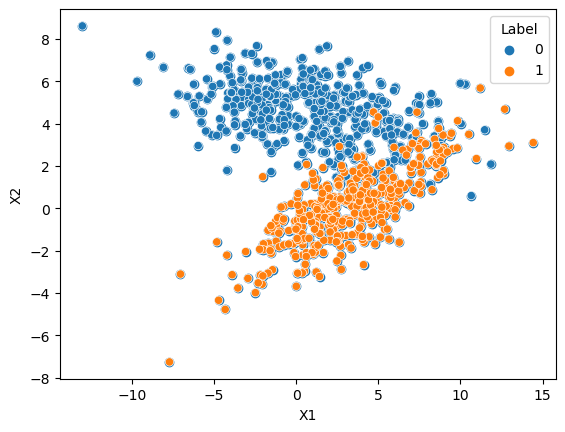

In [20]:
dataset=pd.read_csv('data.csv',header=None)
dataset.columns=["X1",'X2']

plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1])
#plt.scatter(dataset[[1]],dataset[[2]])
z = pd.read_csv('labels.csv',header = None)
z.columns=["Label"]
df = pd.concat([dataset,z],axis = 1)
sns.scatterplot(data = df ,x = 'X1',y = 'X2', hue = 'Label')
#hue='Label': This parameter is optional and is used to assign different colors to the markers based on a categorical variable.




In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset,z,test_size = 0.3,random_state =25)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

560
560
240
240


In [34]:
#Feature scaling to get uniform scale
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = svm.SVC(kernel = 'linear',C = 1)
clf.fit(X_train,Y_train)

c:\Users\RAHUL K R\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [40]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2,metric='euclidean')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred
prbty=classifier.predict_proba(X_test)
prbty

c:\Users\RAHUL K R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RAHUL K R\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [36]:
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(f1_score(Y_test, y_pred))

[[111   7]
 [  7 115]]
0.9426229508196722


TRYING TO solve without sklearn


In [ ]:
def euclidean(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
class K_NN:
    def __init__(self,k=5):
        self.k=k
    def fit1(self,X,Y):
        self.X_train=X
        self.Y_train=Y
    